In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.
In this section we will explore a basic clustering task on some synthetic and real-world datasets.

Here are some common applications of clustering algorithms:

- Compression for data reduction
- Summarizing data as a reprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
   - extract some structure from new data

Let's start by creating a simple, 2-dimensional, synthetic dataset:

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100L, 2L)

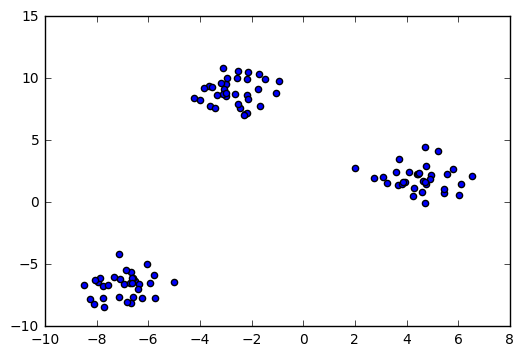

In [16]:
plt.scatter(X[:, 0], X[:, 1]);

In the scatter plot above, we can see three separate groups of data points and we would like to recover them using clustering -- think of "discovering" the class labels that we already take for granted in a classification task.

Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space, which we can't visualize in a single histogram or scatterplot.

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimized. The standard implementation of K-means uses the Euclidean distance, which is why we want to make sure that all our variables are measured on the same scale if we are working with real-world datastets. One technique to achieve this is standardization.

**Question:** what would you expect the output to look like?

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [18]:
labels = kmeans.fit_predict(X)

In [19]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2])

In [20]:
all(y == labels)

False

Let's visualize the assignments that have been found

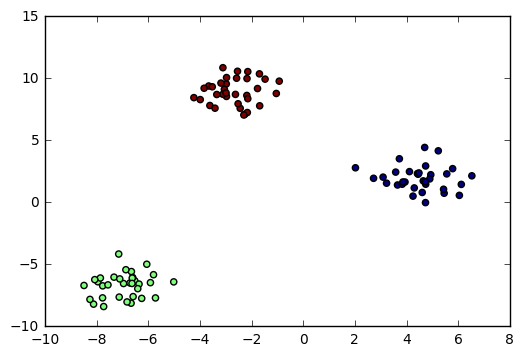

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Compared to the true labels:

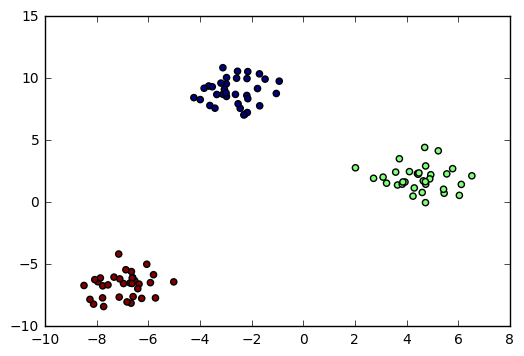

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Here, we are probably satisfied with the clustering results. But in general we might want to have a more quantitative evaluation. How about comparing our cluster labels with the ground truth we got when generating the blobs?

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

('Accuracy score:', 0.0)
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [24]:
np.mean(y == labels)

0.0

---

**Exercise**

After looking at the "True" label array y, and the scatterplot and `labels` above, can you figure out why our computed accuracy is 0.0, not 1.0, and can you fix it?

---

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [25]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

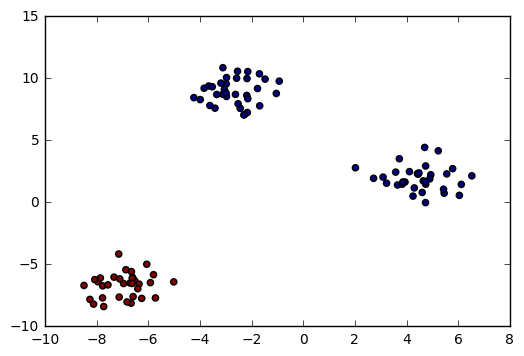

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

#### The Elbow Method

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

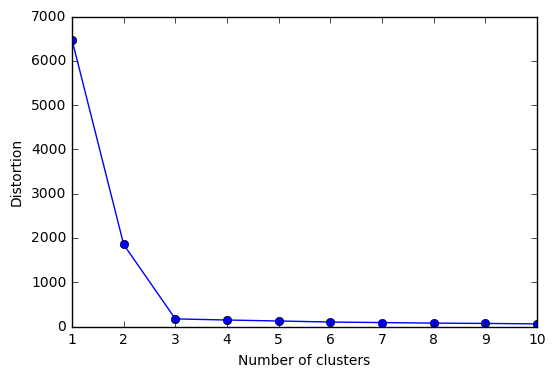

In [27]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our visual expection of the dataset previously.

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.


We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

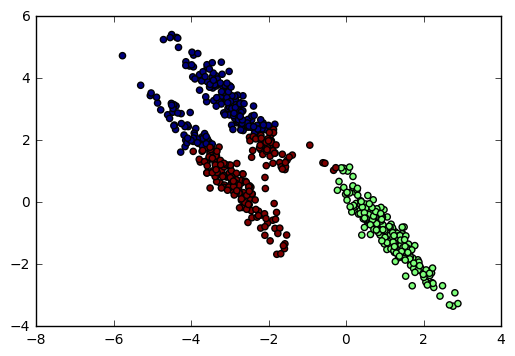

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Some Notable Clustering Routines

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

<b>In the lectures you will find AggClustering and Kmeans.</b>

![clustering sklean](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## Exercise: digits clustering

Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``)  Do the clusters seem to be correlated with particular digits? What is the ``adjusted_rand_score``?



# Task
 
1. Apply K-means and agglomerative clustering (DBSCAN is optional - may be added) to digits dataset
2. Visualize clustering using t-SNE (http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
3. Compare algorithms from #1 using clustering metrics (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster). Play with ``metrics.silhouette_score``, ``metrics.adjusted_rand_score`` and ``metrics.homogeneity_completeness_v_measure``.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets  import load_digits
from sklearn.cluster   import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold  import TSNE
import numpy as np
from matplotlib import offsetbox
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_completeness_v_measure
import pandas as pd

### Import data

In [2]:
digits = load_digits(n_class=10)
X, y = load_digits( return_X_y = True)

### KMeans


In [3]:
# random_state - The generator used to initialize the centers.
kmeans = KMeans( n_clusters=10, random_state=42 )
labels_kmeans = kmeans.fit_predict( X[:] )
centers_kmeans = kmeans.cluster_centers_

#### Agglomerative clustering

In [4]:
agg_clustering = AgglomerativeClustering( n_clusters=10 )
labels_agg = agg_clustering.fit_predict( X[:] )

### Visualisation

plotting function is partly taken from http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [5]:
# Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

### Visualize KMeans

Real handwritten digits are in white squares, the cluster labels for them are in the background in colours

In [6]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform( X )

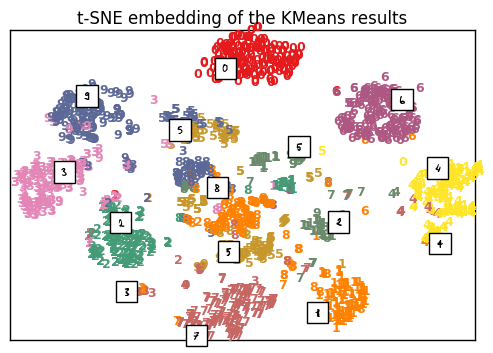

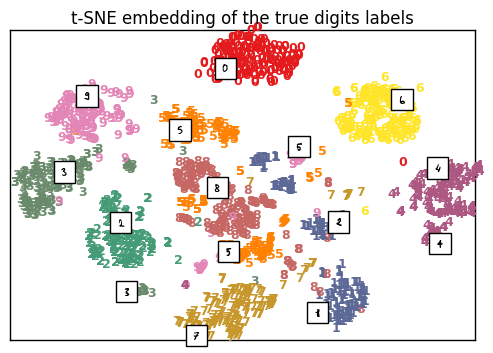

In [7]:
plt.subplots_adjust(hspace=.1)
plot_embedding( X = X_tsne, y = labels_kmeans, title = "t-SNE embedding of the KMeans results" )
plot_embedding( X = X_tsne, y = y, title = "t-SNE embedding of the true digits labels" )
plt.show()

### Visualize Agglomerative Clustering

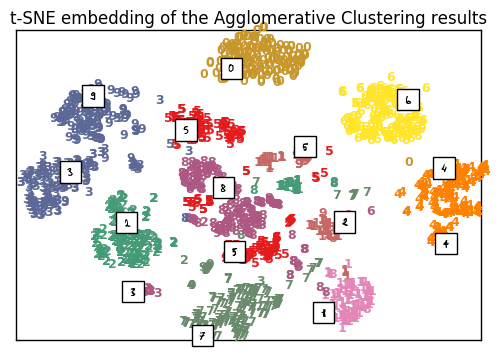

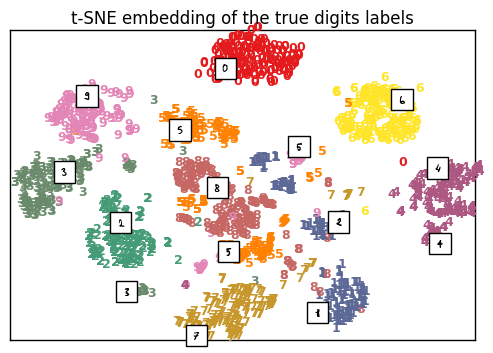

In [8]:
plt.subplots_adjust(hspace=.1)
plot_embedding( X = X_tsne, y = labels_agg, title = "t-SNE embedding of the Agglomerative Clustering results" )
plot_embedding( X = X_tsne, y = y, title = "t-SNE embedding of the true digits labels" )
plt.show()

### Visualize the cluster centers as images 
(i.e. reshape each to 8x8 and use
``plt.imshow``)

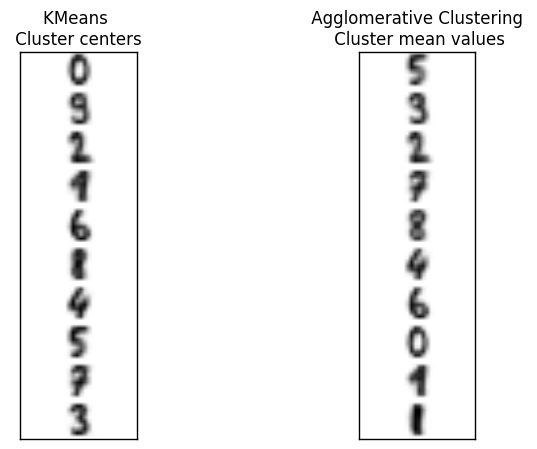

In [37]:
f = plt.figure(figsize=(8, 5))
# ax = fig.add_subplot(2,1,1) # two rows, one column, first plot

# axis for KMeans
ax1 = f.add_subplot(1, 2, 1)

# number of rows inside a figure
n_img = 10
# initialize a future figure
img = np.zeros((10 * n_img, 10 * 3))
j = 0
# in loop plot each image in one figure by placing pixels in the right place of 'img' matrix
for i in range ( n_img ):
    ix = 10 * i + 1
    iy = 10 + 1
    img[ix:ix + 8, iy:iy + 8] = centers_kmeans[i].reshape((8, 8))
plt.xticks([])
plt.yticks([])
ax1.imshow(img, cmap=plt.cm.binary)
ax1.set_title('KMeans \n Cluster centers ')

# the same for Agglomerative clustering
ax2 = f.add_subplot(1,2,2)
n_img = 10
img = np.zeros((10 * n_img, 10 * 3))
j = 0
for i in range ( n_img ):
    img_i = np.mean( X[labels_agg == i], axis = 0 )
    ix = 10 * i + 1
    iy = 10 + 1
    img[ix:ix + 8, iy:iy + 8] = img_i.reshape((8, 8))
plt.xticks([])
plt.yticks([])
ax2.imshow(img, cmap=plt.cm.binary)
ax2.set_title(' Agglomerative Clustering \n Cluster mean values')

#### In KMeans the cluster center for the digit 8 is not clearly understood, the same for 9 in Agglomerative clustering. 

### Adjusted rand score for these two algorithms

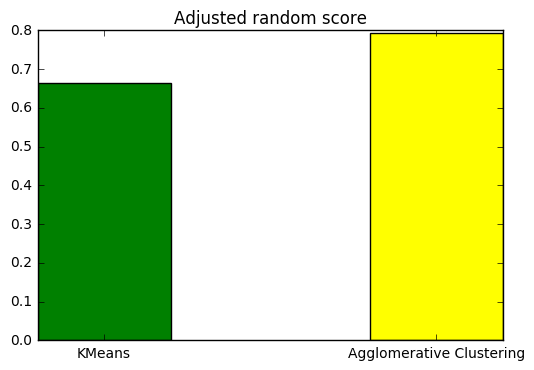

In [38]:
f = plt.figure()
ax = f.add_subplot(111)
ax.bar([0.2, 0.7], \
        [adjusted_rand_score ( y, labels_kmeans), adjusted_rand_score ( y, labels_agg)],\
        color=['green','yellow'],\
      width=0.2)
ax.set_title("Adjusted random score")
ax.set_xticks([.3,.8])
ax.set_xticklabels ( ['KMeans', 'Agglomerative Clustering'] )

# labels = ax.get_legend_labels()
# ax.legend( labels[::-1])
# plt.xticks([])
plt.show()

### Do the clusters seem to be correlated with particular digits?

The majority of digits are clustered satisfactorily, but the mixture of digits (e.g. 5 and 8) provokes the greatest mistakes in the results.

### Comparison of the results by clustering metrics

Compare algorithms from #1 using clustering metrics (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster). Play with ``metrics.silhouette_score``, ``metrics.adjusted_rand_score`` and ``metrics.homogeneity_completeness_v_measure``.

In [39]:
metrics_table = pd.DataFrame( 0, index = ['silhouette score',\
                                          'adjusted rand score',\
                                          'homogeneity',\
                                          'completeness',\
                                          'measure'], \
                             columns = ["KMeans", "Agglomerative Clustering"])
pd.set_option('max_colwidth',200)

metrics_table.loc['silhouette score', "KMeans"] = silhouette_score( X, labels_kmeans )
metrics_table.loc['silhouette score', "Agglomerative Clustering"] = silhouette_score( X, labels_agg )

metrics_table.loc['adjusted rand score', "KMeans"] = adjusted_rand_score( y, labels_kmeans )
metrics_table.loc['adjusted rand score', "Agglomerative Clustering"] = adjusted_rand_score( y, labels_agg )

h, c, m = homogeneity_completeness_v_measure( y, labels_kmeans )
metrics_table.loc[2:,"KMeans"] = [h,c,m]
h, c, m = homogeneity_completeness_v_measure( y, labels_agg )
metrics_table.loc[2:,"Agglomerative Clustering"] = [h,c,m]
print( metrics_table )

                       KMeans  Agglomerative Clustering
silhouette score     0.182443                  0.178497
adjusted rand score  0.664962                  0.794003
homogeneity          0.737745                  0.857513
completeness         0.745229                  0.879096
measure              0.741468                  0.868170


#### Conclusion on clustering metrics
1. Values of silhouette score near 0 indicate overlapping clusters. It is true, since in the pictures we have seen overlapping of 5 and 8, for example.
2. In every metric KMeans has shown poorer results except the silhouette score than the Agglomerative clustering technique